# Imports and Datasets Preparations

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error
from pprint import pprint

## Titanic Dataset for Classification

In [2]:
titanic_data = pd.read_csv('datasets/titanic/titanic_dataset.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# split train, validation and test data: 70:15:15 division
# use random seed to have always the same split if we make different analyses

training_data_clas = titanic_data.sample(frac=0.7, random_state=1234)
data_without_train_clas = titanic_data.drop(training_data_clas.index)
validation_data_clas = data_without_train_clas.sample(frac=0.5, random_state=27)
test_data_clas = data_without_train_clas.drop(validation_data_clas.index)

In [4]:
print(f'Dataset split:\ntraining data: {(len(training_data_clas))}\nvalidation data: {(len(validation_data_clas))}\ntest data: {(len(test_data_clas))}')

Dataset split:
training data: 624
validation data: 134
test data: 133


In [5]:
# for curiosity check how many female and male survived

woman = training_data_clas.loc[training_data_clas.Sex == 'female']['Survived'] # 1: survived, 0: died
rate_woman_survived = sum(woman) / len(woman)
rate_woman_survived

0.7358490566037735

In [6]:
men = training_data_clas.loc[training_data_clas.Sex == 'male']['Survived']
rate_men_survived = sum(men) / len(men)
rate_men_survived

0.19174757281553398

### Features and Target preparation

In [7]:
# the prediction to learn
                
y = training_data_clas['Survived'] # Target of training set
y_val = validation_data_clas['Survived'] # Target of validation set
y.head()

523    1
778    0
760    0
496    1
583    0
Name: Survived, dtype: int64

In [8]:
# the features vector, where we create dummies values to be evaluated

features = ['Pclass', 'Sex', 'SibSp', 'Parch']

X = pd.get_dummies(training_data_clas[features])
X_val = pd.get_dummies(validation_data_clas[features])
X.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male
523,1,0,1,1,0
778,3,0,0,0,1
760,3,0,0,0,1
496,1,1,0,1,0
583,1,0,0,0,1


## Boston Housing Dataset for Regression

In [9]:
boston_housing = pd.read_csv('datasets/boston_housing/BostonHousing.csv')
boston_housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
boston_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [11]:
training_data_reg = boston_housing.sample(frac=0.7, random_state=1234)
data_without_train_reg = boston_housing.drop(training_data_reg.index)
validation_data_reg = data_without_train_reg.sample(frac=0.5, random_state=27)
test_data_reg = data_without_train_reg.drop(validation_data_reg.index)

In [12]:
print(f'Dataset split:\ntraining data: {(len(training_data_reg))}\nvalidation data: {(len(validation_data_reg))}\ntest data: {(len(test_data_reg))}')

Dataset split:
training data: 354
validation data: 76
test data: 76


### Features and Target preparation

In [13]:
# target training and validation
                
yreg = training_data_reg['medv'] # Target of training set
yreg_val = validation_data_reg['medv'] # Target of validation set
yreg.head()

64     33.0
100    27.5
400     5.6
485    21.2
454    14.9
Name: medv, dtype: float64

In [14]:
# the features vector

features_reg = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

Xreg = training_data_reg[features_reg]
Xreg_val = validation_data_reg[features_reg]
Xreg.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05
100,0.14866,0.0,8.56,0,0.5200,6.727,79.9,2.7778,5,384,20.9,394.76,9.42
400,25.04610,0.0,18.10,0,0.6930,5.987,100.0,1.5888,24,666,20.2,396.90,26.77
485,3.67367,0.0,18.10,0,0.5830,6.312,51.9,3.9917,24,666,20.2,388.62,10.58
454,9.51363,0.0,18.10,0,0.7130,6.728,94.1,2.4961,24,666,20.2,6.68,18.71


# RandomForest

## Ensemble Methods
Before analyzing the Random Forest, I have to introduce the concept of ensemble methods, there are two main kind of these:
- Bagging
- Boosting

### Bagging Method
Bagging is an aggregation of independent generating models of the same kind, where the prediction is the combined voting/average of all the models. Baggings is a good idea when it is used to combine unstable classifier such as decision trees, regression trees, linear regression, neural networks:
- it is used to stabilize the unstable classifier, aggregating them
- it reduces the overall variance and keeping the bias unchanged
- reduce the overfitting of these high variance classifier (if they are taken separately)
- each new model is independent of the other
- the training data is random with bootstrap

### Boosting Method
Boosting merges a sequence of simple classifier by correcting itself over the misclassified data. As said it is a good idea when using stable and simple classifier such as KNN or model with strong regularizations:
- it reduces the overall bias, keeping variance unchanged
- each model is dependent of the previous one when trained
- the training data is the misclassified previus dataset

## Random Forest Classifier/Regression

Random Forests are an application of the bagging method. They are ensembles of unpruned decision tree learners with randomized selection of features at each split.
<br>
The generalization error of a forest of tree classifiers depends on:
- The strength of the individual trees in the forest
- The correlation between them

### Classification

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
pprint(rf_model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


#### Main Parameters

These are a lot of parameters, we are interested in:
- criterion: function used to measure the quality of a split for each tree, main
    - entropy
    - gini
- n_estimators: number of trees in the forest
- max_features: max number of features considered for splitting a node
- max_depth: max number of levels in each decision tree
- min_samples_split: min number of data points placed in a node before the node is split
- min_samples_leaf: min number of data points allowed in a leaf node
- bootstrap: method for sampling data points (with or without replacement)

In [35]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf_model.fit(X, y)
rf_preds = rf_model.predict(X_val)
#accuracy_score(rf_preds, y_val)
print(classification_report(rf_preds, y_val))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77        77
           1       0.70      0.68      0.69        57

    accuracy                           0.74       134
   macro avg       0.73      0.73      0.73       134
weighted avg       0.74      0.74      0.74       134



<AxesSubplot:>

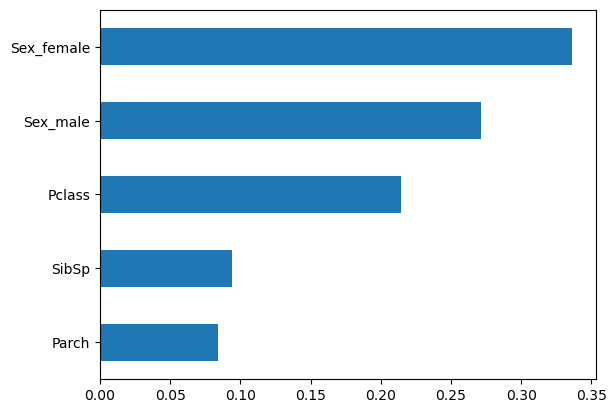

In [36]:
# print feature importances created in randomForest

importances = rf_model.feature_importances_
importances
forest_importances = pd.Series(importances, index=X.columns)
forest_importances = forest_importances.sort_values()
forest_importances.plot(kind='barh')

### Regression

In [37]:
# parameter analysis is very similar to that done previously for the classification model

from sklearn.ensemble import RandomForestRegressor

rfreg_model = RandomForestRegressor()
pprint(rfreg_model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [38]:
rfreg_model.fit(Xreg, yreg)
rfreg_preds = rfreg_model.predict(Xreg_val)
r2_score(yreg_val, rfreg_preds)

0.6370227935137224

## RandomForest Search Grid Cross-Validation

### Random Hyperparamter Grid & Searching
We use an initial random grid to find a closer range, so later we can apply the grid search in a lower range search.

In [39]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start=5, stop=50, num=10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# create the random grid

random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'bootstrap' : bootstrap
}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [40]:
# now we can do the search on the training set
# we use 3 fold cross validation over 100 different combinations

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                               n_iter=100, cv=3, verbose=2, n_jobs=-1)
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   verbose=2)

In [41]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}

In [42]:
best_random = rf_random.best_estimator_
pred = best_random.predict(X_val)
accuracy_score(pred, y_val)

0.746268656716418

### Grid Search with Cross Validation
Random search allowed us to narrow down the range for each hyperparameter.

In [43]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 25, 50],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
    'n_estimators': [100, 300, 1000]
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [44]:
grid_search.fit(X, y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 25, 50],
                         'max_features': ['auto'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 300, 1000]},
             verbose=2)

In [45]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [46]:
best_grid = grid_search.best_estimator_
grid_preds = best_grid.predict(X_val)
accuracy_score(grid_preds, y_val)

0.7388059701492538